# MSCI FINAL REPORT

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### a. Increasing the number of paths in the MC simulation 

In [38]:
numSims = pd.read_csv("HestonModel/simlations.csv")
numSims.head()

,Number simulations,Option price,Time to run (milli seconds)
0,500,21.6948,17
1,1500,24.6929,37
2,2500,26.0113,78
3,3500,24.5443,95
4,4500,24.4781,111


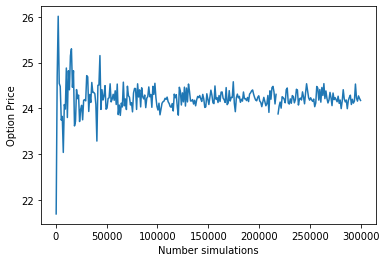

In [51]:
plt.plot(numSims['Number simulations'], numSims['Option price'])
plt.xlabel("Number simulations")
plt.ylabel("Option Price")
plt.show()

The time to compute is almost linearly co-related with the number of paths to consider, as one can expect. 
1. However, we created our array objects and allocated memory to it in the beginning of the the iterations (which is the part that runs "M times") so that we can replace these with the expected results in the loop. 
2. Another computational method of increasing speed could be to use multiple cores and introduce some form of parallization. 
3. Additionally, variance reduction methods are also employed to make Monte Carlo simulations faster and more robust, I have not worked on this but I found several papers about it online. 

### b. Changing the step size of discretization

In [31]:
numSteps = pd.read_csv("HestonModel/timeSteps.csv")

numSteps.head()

,Number time steps,Option price,Time to run (milli seconds)
0,100,25.3530,137
1,200,24.5106,268
2,300,25.2077,314
3,400,23.8872,415
4,500,23.5029,568


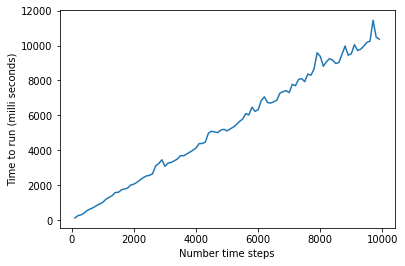

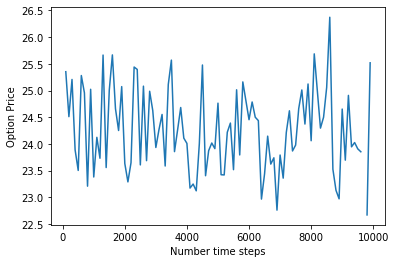

In [52]:
plt.plot(numSteps['Number time steps'], numSteps['Time to run (milli seconds)'])
plt.xlabel("Number time steps")
plt.ylabel("Time to run (milli seconds)")
plt.show()
plt.plot(numSteps['Number time steps'], numSteps['Option price'])
plt.xlabel("Number time steps")
plt.ylabel("Option Price")
plt.show()

Speed of convergence in this case as well, is linearly increasing with increasing the Number of steps. So smaller N can have faster convergence.
Howevern on increasing N, and consequently reducing 1/N, would increase the precision of pricing - since the Euler method is a first-order method, which means that the local truncation error is proportional to the square of the step size, and the global truncation error is proportional to the step size. 


### c. Initial volatility and long term mean of volatility

In [36]:
vol = pd.read_csv("HestonModel/initialVolatility.csv")
vol.head()

,Initial volatility,Option price,Time to run (milli seconds)
0,0.20,19.5089,11
1,0.25,24.3465,15
2,0.40,30.3431,13
3,0.50,33.4969,11
4,0.60,36.9275,11


The initial volatility and long term mean influence the smile (implied volatility vs delta) curve while calibrating the option to market prices. There has been papers written on this ( example https://core.ac.uk/download/pdf/301532719.pdf and this can also be seen in while calibration) that changing the initial volatility allows adjustment in the height of the smile curve rather than the shape. Increasing the initial volatility, moves the implied volatility smile upwards.

### d. Stochastic volatility vs constant volatility

(In the C++ the value is computed to be around 16.35 approximately)

Under the Heston model, the underlying asset follows an evolution process which is similar to the Black Scholes Model (BSM), but it also introduces a stochastic behavior for the volatility process. In particular, Heston makes the assumption that the asset variance follows a mean reverting Cox-Ingersoll-Ross process.

Stochastic volatility models tackle one of the most restrictive hypotheses of the BSM model;
namely, the assumption that volatility remains constant during the option´s life. Observing
financial markets it can be easily seen that volatility is not a constant quantity. This is also
reflected in the different implied volatility levels at which options with different strikes and
maturities trade in the market, which collectively give rise to the so-called volatility surface.

Among volatility models, Heston’s dynamics exhibit several desirable properties. 
First, it models volatility as a mean-reverting process. This assumption is consistent with the behavior
observed in financial markets. If volatility were not mean-reverting, markets would be
characterized by a considerable amount of assets with volatility exploding or going near zero.
In practice, however, these cases are quite rare and generally short-lived.

Second, it also introduces correlated shocks between asset returns and volatility. This
assumption allows modelling the statistical dependence between the underlying asset and its
volatility, which is a prominent feature of financial markets. For instance, in equity markets,
volatility tends to increase when there are high drops in equity prices, and this relationship
may have a substantial impact in the price of contingent claims.

Consequently, the Heston model provides a versatile modelling framework that can
accommodate many of the specific characteristics that are typically observed in the behavior
of financial assets.

# THANK YOU!